In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
x=data.iloc[: , 3:13]
y=data.iloc[:, 13]

In [6]:
# Creating a dummy variables
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)
x=pd.concat([x,geography,gender],axis=1)
x=x.drop(['Geography','Gender'],axis=1)

In [7]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
x.shape

(10000, 11)

In [8]:
# Splitting the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
# Importing Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [23]:
#Initializing ANN
classifier=Sequential()

In [32]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer='he_normal', activation="relu",input_dim=11))
classifier.add(Dropout(0.3))

In [33]:
# Adding the second hidden layer
classifier.add(Dense(12, kernel_initializer='he_normal', activation="relu"))
classifier.add(Dropout(0.4))

In [34]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation="sigmoid"))

In [35]:
# Compiling ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
# Fitting the ANN to the training set
model_hist=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5258 - accuracy: 0.8192 - val_loss: 0.4090 - val_accuracy: 0.8482
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4018 - accuracy: 0.8526 - val_loss: 0.3701 - val_accuracy: 0.8584
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3870 - accuracy: 0.8550 - val_loss: 0.3651 - val_accuracy: 0.8580
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3834 - accuracy: 0.8503 - val_loss: 0.3632 - val_accuracy: 0.8603
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3795 - accuracy: 0.8505 - val_loss: 0.3664 - val_accuracy: 0.8603
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3806 - accuracy: 0.8554 - val_loss: 0.3689 - val_accuracy: 0.8591
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3714 - accuracy: 0.8584 - val_loss: 0.3679 - val_accuracy: 0.8591

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8559 - val_loss: 0.3568 - val_accuracy: 0.8561
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8582 - val_loss: 0.3588 - val_accuracy: 0.8531
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8571 - val_loss: 0.3602 - val_accuracy: 0.8527
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8571 - val_loss: 0.3556 - val_accuracy: 0.8595
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8546 - val_loss: 0.3635 - val_accuracy: 0.8497
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3563 - accuracy: 0.8552 - val_loss: 0.3613 - val_accuracy: 0.8497
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8584 - val_loss: 0.3565 - val_accuracy:

In [37]:
# List all the data in history
print(model_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


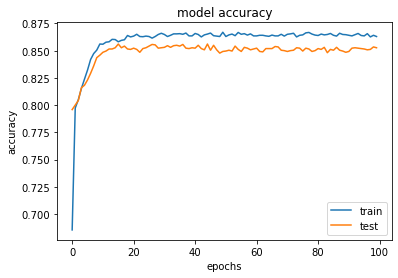

In [33]:
# Summarize history for accuracy

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='lower right')
plt.show()

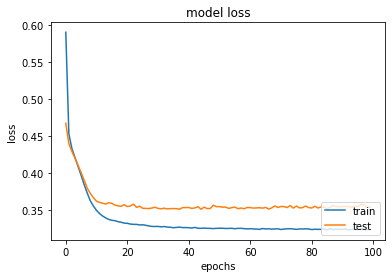

In [34]:
# Summarize history of loss

plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'], loc='lower right')
plt.show()

In [38]:
# Predicting and evaluating the model
y_pred=classifier.predict(x_test)
y_pred=(y_pred > 0.5)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[1572   23]
 [ 258  147]]


In [40]:
accuracy_score(y_test,y_pred)

0.8595